In [1]:
import graph_experiments_utils_vp2 as gu

In [2]:
G = gu.erdos_renyi_random_location(10,0.4)

In [3]:
from graph_experiments_utils_vp2 import *

functions_list = [n_triangles,transitivity,
     node_connectivity,
     size_maximum_clique,
     n_maximal_cliques,
     min_weighted_vertex_cover_len,tree_number]

graph_function = erdos_renyi_random_location

attr=[]

loop_print_flag = True
iterations_print_flag = True

loop_1 = dict(n=[10,20,50,100,150])
loop_2 = dict(p=[0.05,0.1,0.15,0.2,0.25,0.3,0.35,0.4])
iterable_loops = [loop_1,loop_2]
n_iterations = 2


data_structure = run_graph_experiment(graph_function,
                        functions_list,
                        iterable_loops,
                         n_iterations,
                         func_args = dict(),
                         loop_print_flag = loop_print_flag,
                        iterations_print_flag = iterations_print_flag,
                         attr=attr
                                     )

               Working on ['n=10', 'p=0.05'], iter = 0
               Graph Creation time = 0.00012874603271484375
               Total time for iteration = 0.0023288726806640625
               Working on ['n=10', 'p=0.05'], iter = 1
               Graph Creation time = 0.00011754035949707031
               Total time for iteration = 0.0009806156158447266
Total time for parameter loop = 0.003497600555419922
               Working on ['n=10', 'p=0.1'], iter = 0
               Graph Creation time = 0.00022530555725097656
               Total time for iteration = 0.0012602806091308594
               Working on ['n=10', 'p=0.1'], iter = 1
               Graph Creation time = 0.00010538101196289062
               Total time for iteration = 0.0032591819763183594
Total time for parameter loop = 0.004767894744873047
               Working on ['n=10', 'p=0.15'], iter = 0
               Graph Creation time = 0.00017523765563964844
               Total time for iteration = 0.001710653305053711
  

/usr/local/lib/python3.6/dist-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


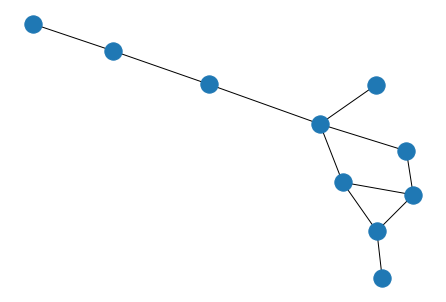

In [4]:
current_graph = data_structure["erdos_renyi_random_location_n=10_p=0.25"]["example_graph"]
current_graph_example = current_graph
nx.draw(current_graph)

In [5]:
def graph_network_vp3(G,plot_type="2D",layout="non_random",locations=None,
                 colors=None,
                 default_color="blue",
                  colors_edge = None,
                  default_color_edge = "green",
                 plot_title="",
                 return_fig = False):
    """
    Purpose: To graph a network in either 2D or 3D with 
    optional specifications for different colors and different layouts
    
    -------Parameters (all of these parameters can be lists so can support multiple graph): ----------
    G (nx.Graph) : The Graph that will be plotted
    plot_type (str) : Specifies whether you want a 2D or 3D graph
    layout (np.array of str): Either a word description of how the nodes should be layed out in 2D (random or projection)
                            Or cartesian/random in 3D
    
    *locations (dict) : Overrides the existing locations that may be store in the graph structure
                            as node attributes
                            
    *color_list (dict/str) : Specifies the colors of each node to be plotted 
                            (could be string and just set as "location" to have as default
                            or "color" name to specify colors for all)
                            
                            
    ------  Returns: None ---------
    
    Pseudocode: 
    1) Identify how many graphs have been passed and start loop that will go through all graphs
        - if multiply graphs then verify that plot type is all the same if it is a list
        
    2) check if color list specified: (identify as list or scalar --> turn to list)
        a. If yes --> make sure that it matches the number of nodes for all the graphs 
                    (if "locations" or "color" specified then create list for that)
        b. If no --> check for color attributes within the nodes of the graph
            i. if yes --> extract those as the color list
            ii. if no --> generate random color list for nodes
    3) Identify the locations vector specified: (identify as list or scalar --> turn to list)
        - if none in either override or graph then just save as empty array
    4) Identify the type of plot wanted (identify as list or scalar --> turn to list)
                ****** for 2 - 4, if a list was specified but not the same length as Graph 
                        (and not 1) then raise exception *******************
                        
    a. If 2D type: get the layout type:
        If random --> use grave with no color specifications (and specify colors)
        Others: 
        If projection --> use grave put specify the correct projection (and specify colors)
    b. If 3D type: 
        if random --> generate random locations and then plot using ipyvolume
        if blank or cartesian --> use the locations specified in graph or locations
        
    5) Continue for all graphs
    6) issue the plot command
        
        
        
    Example on how to use:
    
    # print("\n\n\n*************** SIMPLE GRAPH *********************")
    #Simple graph

    return_value = graph_network_vp2(current_graph_example,plot_type="3D",layout="random",
                                              colors="pink")



    #Specifying different colors and locations

    # How to specify new locations

    variable_locations =np.array([[random.uniform(0, 1),
                               random.uniform(0, 1),
                               random.uniform(0, 1)] for i in range(0,len(current_graph_example.nodes))])

    celii_locations = dict([(n,vl) for n,vl in zip(current_graph_example.nodes,variable_locations)])

    # How to specify new colors with dictionary
    print("\n\n\n*************** DICTATING THE COLORS AND DICTIONARIES  *********************")

    celii_colors= dict([(n,vl) for n,vl in zip(current_graph_example.nodes,variable_locations)])



    return_value = graph_network_vp2(current_graph_example,plot_type="3D",
                                                layout="collapse_z",
                                               #locations = celii_locations,
                                              colors="locations",
                                             #colors = celii_colors
                                                )


    print("\n\n\n*************** OVERLAYING MULTIPLE GRAPHS  *********************")
    # Doing multiple graphs:

    graph_objects_list = [ er_data_structure[k]["example_graph"] for k in graphs_in_experiment[1:4]]

    return_value = graph_network_vp2(graph_objects_list,plot_type="2D",
                                    layout="random",
                                    colors=["blue","pink","purple"])
    
    
    
    
    --------------------------------------------- how to do multiple graphs--------------------
    
    # Testing the directional in 3D:
    #creates the new directional graph
     ------- MAKE THE FIRST GRAPH ------
    DG = nx.DiGraph()
    DG.add_edges_from(list(current_graph_example.edges))
    DG.add_nodes_from(list(current_graph_example.edges))
    #missing_nodes = [k for k in current_graph_example.nodes if k not in DG.nodes]


    #creates dictionary for node and edge colors
    node_colors = dict([(k,np.random.uniform(0,1,(3,))) for k in DG.nodes])

    edge_colors =  np.ones((len(DG.edges),3))
    edge_colors[:4] = np.array([0,1,0])
    edge_colors[4:7] = np.array([1,0,0])
    edge_colors[7:] = np.array([0,0,1])

    edge_colors_dict = dict([(k,edge_colors[i]) for i,k in enumerate(DG.edges)])

     ------- MAKE THE SECOND GRAPH ------

    DG_2 = nx.DiGraph()
    DG_2.add_edges_from(list(current_graph_example_2.edges))
    DG_2.add_nodes_from(list(current_graph_example_2.edges))


    #creates dictionary for node and edge colors
    node_colors_2 = dict([(k,np.random.uniform(0,1,(3,))) for k in DG_2.nodes])

    edge_colors_2 =  np.ones((len(DG_2.edges),3))
    edge_colors_2[:4] = np.array([0,1,0])
    edge_colors_2[4:7] = np.array([1,0,0])
    edge_colors_2[7:] = np.array([0,0,1])

    edge_colors_dict_2 = dict([(k,edge_colors_2[i]) for i,k in enumerate(DG_2.edges)])


    graph_network_vp2([DG,DG_2],plot_type="3D",layout="random",locations=None,
                     #colors=[node_colors,node_colors_2],
                      colors=["blue","red"],
                     default_color="blue",
                      #colors_edge = [edge_colors_dict,edge_colors_dict_2],
                      colors_edge = ["pink","yellow"],
                      default_color_edge = "green",
                     plot_title="Example on Digraph",
                     return_fig = False)
                            
    """
    
    """   STEP 1
    1) Identify how many graphs have been passed and start loop that will go through all graphs
    - if multiply graphs then verify that plot type is all the same if it is a list
    """
    
    #make a copy of the graph so not alter attributes
    G = G.copy(as_view=False)
    
    
    multiple_graph_flag = False
    if type(G) == list:
        multiple_graph_flag = True
        graph_list = G
    else: 
        if (type(G) != type(nx.Graph()) 
                and type(G) != type(nx.DiGraph())
                and type(G) != type(nx.MultiGraph())
                and type(G) != type(nx.MultiDiGraph())):
            raise Exception("The graph is not a network ")
        graph_list = [G]
            
    """         # ------------------------- WORKING ON LOCATION ---------------------------------- #
    3) Identify the locations vector specified: (identify as list or scalar --> turn to list)
    - if none in either override or graph then just save as empty array
    """
    
    def graph_locations(gr):
        extracted_location = nx.get_node_attributes(gr,"location")
        if len(extracted_location.keys()) <= 0:
            extracted_location = nx.get_node_attributes(gr,"locations")
        return extracted_location
    
    def dict_locations(gr,locations):
        if set(locations.keys()) == set(gr.nodes):
            return locations
        else:
            raise Exception("Dictionary passed for locations list does not match keys of graph")
            
    
    

    locations_list = []
    if type(locations) == list:
        if len(locations_list) != len(graph_list):
            raise Exception("locations list passed but does not match size of graph lists")
        for i,(l,gr) in enumerate(zip(locations,graph_list)):
            if type(l) == dict:
                locations_list.append(dict_locations(gr,l))
            else:
                locations_list.append(graph_locations(gr))
                
#             if set(l.keys()) == set(graph_list[i].nodes):
#                 current_locations = l
#             else:
#                 current_locations = dict() #stores empty dictionary if nothing or wrong thing provided
            
#             #append the current_locations to the total list
#             locations_list.append(current_locations)
        
    elif type(locations) == dict:
        for g in graph_list:
            locations_list.append(dict_locations(g,locations))
        
    else: #try to extract from the graph (will fill with empty list if not there)
        for i,gr in enumerate(graph_list):
            #print("Trying to extract locations from graph")
            locations_list.append(graph_locations(gr))
            
     
    #print("locations_list = " + str(locations_list))
    if len(locations_list) != len(graph_list):
            raise Exception("number of Location specified in list do not match number of graphs")
            


    """  # ------------------------- WORKING ON COLOR ---------------------------------- #
    2) check if color list specified: (identify as list or scalar --> turn to list)
    a. If yes --> make sure that it matches the number of nodes for all the graphs 
                (if "location" or "color" specified then create list for that)
    b. If no --> check for color attributes within the nodes of the graph
        i. if yes --> extract those as the color list
        ii. if no --> generate random color list for nodes
    
    """
    
    
    def string_color(colors,g,current_location=None):
        if colors == "locations":
            if set(g.nodes) != set(current_location.keys()):
                raise Exception("Color list specified as locations but the locations don't match the Graph list")
            return current_location
        else:
            return dict([(node_name,matplotlib.colors.to_rgb(colors)) for node_name in g.nodes()])
        
    def dict_color(colors,g):
        if set(g.nodes) != set(colors.keys()):
            raise Exception("Color list specified as dictionary not matching the nodes of the graph")
        else:
            return colors
    
    color_list = []
    if type(colors) == str:
        for g,current_location in zip(graph_list,locations_list):
            color_list.append(string_color(colors,g,current_location))
                      
    elif type(colors) == dict:
        for g in graph_list:
            color_list.append(dict_color(colors,g))
          
    elif type(colors) == list:
        if len(colors) != len(graph_list):
            raise Exception("Color list recieved but length of list not match length of graphs")
        for c,g,current_location in zip(colors,graph_list,locations_list):
            #print("Colors = " + str(c) + "type = " + str(type(c)))
            if type(c) == str:
                color_list.append(string_color(c,g,current_location))
            elif type(c) == dict:
                color_list.append(dict_color(c,g))
            else:
                raise Exception("Found color type in list that is not string or dictionary")
     
    else: #try to extract the colors from the graph (if not there then will just extract empty list)
        for i,gr in enumerate(graph_list):
            color_list.append(nx.get_node_attributes(graph_list[i],"colors"))
            
            
            
            
                
    #print(f"graph_list = {graph_list},\n location_list = {locations_list},\n color_list = {color_list}")
    
    
    
    
    if len(color_list) != len(graph_list):
         raise Exception("number of Colors specified in list do not match number of graphs")
            
    # go through and set all empty dictionaries to blue
    for i,c in enumerate(color_list):
        #print("c = " + str(c))
        if len(list(c.keys())) <= 0:
            print(f"Color list index {i} is blank so setting  color to default of {default_color}")
            color_list[i] = dict([(node_name,matplotlib.colors.to_rgb(default_color)) for node_name in graph_list[i].nodes])
            
    """  # ------------------------- WORKING ON EDGEEEEEE COLORING ---------------------------------- #
    1) build dictionary that maps the edges to the color
    
    """
    
    
    def string_color_edge(colors,g,current_location=None):
        #print("Colors = " + str(colors))
        #print("g = " + str(g))
        return dict([(node_name,matplotlib.colors.to_rgb(colors)) for node_name in g.edges()])
        
    def dict_color_edge(colors,g):
        if set(g.edges()) != set(colors.keys()):
            raise Exception("Color Edge list specified as dictionary not matching the nodes of the graph")
        else:
            return colors
    
    color_list_edge = []
    if type(colors_edge) == str:
        #print("Colors_edge = " + str(colors_edge))
        for g in graph_list:
            color_list_edge.append(string_color_edge(colors_edge,g))
                      
    elif type(colors_edge) == dict:
        for g in graph_list:
            color_list_edge.append(dict_color_edge(colors_edge,g))
          
    elif type(colors_edge) == list:
        if len(colors_edge) != len(graph_list):
            raise Exception("Color Edge list recieved but length of list not match length of graphs")
        for c,g in zip(colors_edge,graph_list):
            #print("Colors = " + str(c) + "type = " + str(type(c)))
            if type(c) == str:
                color_list_edge.append(string_color_edge(c,g,current_location))
            elif type(c) == dict:
                color_list_edge.append(dict_color_edge(c,g))
            else:
                raise Exception("Found color EDGE type in list that is not string or dictionary")
     
    else: #try to extract the colors from the graph (if not there then will just extract empty list)
        for i,gr in enumerate(graph_list):
            #print("No color edges provided")
            extracted_edge_colors = nx.get_edge_attributes(graph_list[i],"colors")
            if len(extracted_edge_colors) <= 0:
                extracted_edge_colors = nx.get_edge_attributes(graph_list[i],"color")
            color_list_edge.append(extracted_edge_colors)
            

    #print("color_list_edge = " + str(color_list_edge))
    if len(color_list_edge) != len(graph_list):
         raise Exception("number of Colors specified in list do not match number of graphs")
            
    # go through and set all empty dictionaries to blue
    for i,c in enumerate(color_list_edge):    
        if len(list(c.keys())) <= 0:
            print(f"Color list index EDGE {i} is blank so setting  color to default of {default_color_edge}")
            color_list_edge[i] = dict([(node_name,matplotlib.colors.to_rgb(default_color_edge)) for node_name in graph_list[i].edges])
            

    
    
    """# ------------------------- WORKING ON GRAPHING ---------------------------------- #"""

    #return locations_list, color_list
    if plot_type == "3D":
        fig = ipv.figure()
    else:
        fig = plt.figure()
    
    
    for i,(current_graph,current_locations,current_color,current_color_edge) in enumerate(zip(graph_list,locations_list,color_list,color_list_edge)):
        if plot_type == "3D":
            directional_flag = False
            if type(current_graph) == type(nx.DiGraph()) or type(G) == type(nx.MultiGraph()):
                directional_flag = True
                
            
            #check that there are valid locations
            location_check = set(current_locations.keys()) != set(current_graph.nodes)
            if location_check or layout=="random": #then use the random locations
                if location_check:
                    print(f"Using Random location because the current location keys did not match those of the nodes for graph {i}")
                else:
                    print(f"Using random location because random specified for graph {i}")
                variable_locations =np.array([[random.uniform(0, 1),
                           random.uniform(0, 1),
                           random.uniform(0, 1)] for i in range(0,len(current_graph.nodes))])

                current_locations = dict([(n,vl) for n,vl in zip(current_graph.nodes,variable_locations)])
            
            if set(current_locations.keys()) != set(current_graph.nodes):
                raise Exception(f"Specified 3D graph but length of locations keys do not match length of nodes in graph {i}")
                

            
            node_locations = np.array([current_locations[current_n] for current_n in current_graph.nodes])
            
            #print("node_locations = " + str(node_locations))
            #print("current_graph.edges = " + str(current_graph.edges))
            node_colors = np.array([current_color[current_n] for current_n in current_graph.nodes])
            node_colors_edge = np.array([current_color_edge[current_n] for current_n in current_graph.edges])
            
            #print("current_color_edge = " + str(repr(current_color_edge)))
            
            node_edges = np.array(list(current_graph.edges))

            midpoints = []
            directions = []
            for n1,n2 in current_graph.edges:
                difference = node_locations[n1] - node_locations[n2]
                directions.append(difference)
                midpoints.append(node_locations[n2] + difference/2)
            directions = np.array(directions)
            midpoints = np.array(midpoints)
            
            rgb_edges_color = node_colors_edge
            #print("rgb_edges_color = " + str(repr(rgb_edges_color)))
            total_colors_options = np.unique(rgb_edges_color,axis=0)
            #print("total_colors_options = " + str(repr(total_colors_options)))
            for n in total_colors_options:
                #print("n = " + str(repr(n)))
                #print("np.where(rgb_edges_color == n)[0] = " + str(repr(np.where(rgb_edges_color == n)[0])))
                color_indices = np.where(np.sum(rgb_edges_color == n,axis=1) >= 3)[0]
                #color_indices = np.unique(np.where(rgb_edges_color == n)[0])
                #print(color_indices)


                ipv.plot_trisurf(node_locations[:,0], 
                                node_locations[:,1], 
                                node_locations[:,2], 
                                lines=node_edges[color_indices],
                                color = n#marker="sphere",
                                #size = 10)
                                             )
                if directional_flag:
                    current_midpoints = midpoints[color_indices]
                    current_directions = directions[color_indices]
                    ipv.pylab.quiver(current_midpoints[:,0],current_midpoints[:,1],current_midpoints[:,2],
                    current_directions[:,0],current_directions[:,1],current_directions[:,2],
                    size=10,
                    size_selected=20,
                    color = n)
            
#             edges_mesh = ipv.plot_trisurf(node_locations[:,0], 
#                             node_locations[:,1], 
#                             node_locations[:,2], 
#                             lines=noed_edges,
#                             color = default_color_edge)#marker="sphere",
#                             #size = 10)
            #edges_mesh.color = [0., 1., 0.]
            # how to plot things in 3D: 
            nodes_mesh = ipv.pylab.scatter(node_locations[:,0], 
                                    node_locations[:,1], 
                                    node_locations[:,2],
                                    color=node_colors,
                                    size = 2,
                                    
                                    marker = "sphere")

            #makes it plot in unit cube
            
                
            
            cube_limits = [-0.5,1.5]
            ipv.xlim(cube_limits[0],cube_limits[1])
            ipv.ylim(cube_limits[0],cube_limits[1])
            ipv.zlim(cube_limits[0],cube_limits[1])
        else:
            """
            
            """
            
                #https://networkx.github.io/grave/latest/gallery/plot_grid.html
    
    
            def degree_colorer(node_attributes):
                color = node_attributes['color']
                shape = 'o' #random.choice(['s', 'o', '^', 'v', '8'])
                return {'color': color, 'size': 1000, 'shape': shape}

            def font_styler(attributes):
                return {'font_size': 8,
                        'font_weight': .5,
                        'font_color': 'k'}

            def pathological_edge_style(edge_attributes):
                color = edge_attributes['color']
                return {'color': color}

            
            network = current_graph
            #check if node color attributes already there
            nx.set_node_attributes(network, current_color, 'color')
            nx.set_edge_attributes(network, current_color_edge, 'color')
            
            #len(nx.get_node_attributes(current_graph,"color")) <= 0
            
            print("current_color_edge = " + str(current_color_edge))
            location_check = set(current_locations.keys()) != set(current_graph.nodes)
            if location_check or layout=="random": #then use the random locations
                if location_check and layout!="random":
                    print(f"Using Random location because the current location keys did not match those of the nodes for graph {i}")
                else:
                    print(f"Using random location because random specified for graph {i}")
                plot_network(network,
                    node_style=degree_colorer,
                     edge_style=pathological_edge_style,
                     node_label_style=font_styler,
                     #edge_label_style=tiny_font_styler)
                    )
            else:
                if layout == "collapse_x":
                    #print("Collapsing along x axis for 2D visualziation")
                    plot_title += "\nCollapse along X axis"
                    plot_network(network,
                                 layout=lambda G: {node: (current_locations[node][1],
                                        current_locations[node][2]) for node in G},
                                node_style=degree_colorer,
                                node_label_style=font_styler,
                                edge_style=pathological_edge_style,
                     
                                )
                    plt.xlabel("Y axis")
                    plt.ylabel("Z axis")
                elif layout == "collapse_y":
                    #print("Collapsing along y axis for 2D visualziation")
                    plot_title += "\nCollapse along Y axis"
                    plot_network(network,
                                 layout=lambda G: {node: (current_locations[node][0],
                                        current_locations[node][2]) for node in G},
                                node_style=degree_colorer,
                                node_label_style=font_styler,
                                edge_style=pathological_edge_style,
                     
                                )
                    plt.xlabel("X axis")
                    plt.ylabel("Z axis")
                else:
                    #print("Collapsing along z axis for 2D visualziation")
                    if  layout != "collapse_z":
                        print("Plotting by collapsing acorss z because no valid layout was chosen")
                    plot_title += "\nCollapse along Z axis"
                    plot_network(network,
                                 layout=lambda G: {node: (current_locations[node][0],
                                        current_locations[node][1]) for node in G},
                                node_style=degree_colorer,
                                node_label_style=font_styler,
                                edge_style=pathological_edge_style,
                     
                                )
                    plt.xlabel("X axis")
                    plt.ylabel("Y axis")
                
                    
                    
    
    if return_fig:
        if plot_type == "2D":
            fig.suptitle(plot_title)
        else:
            pass
        return fig
    
    if plot_type == "3D":
        ipv.show()
        
    else:
        fig.set_figheight(10)
        fig.set_figwidth(10)
        plt.show()    
        




In [ ]:
In [1]: import networkx as nx

In [2]: G = nx.Graph()

In [3]: G.add_node(1,color='red')

In [4]: G.node[1]['shape']='pear'

In [5]: list(G.nodes(data=True))
Out[5]: [(1, {'color': 'red', 'shape': 'pear'})]

In [6]: del G.node[1]['color']

In [7]: list(G.nodes(data=True))
Out[7]: [(1, {'shape': 'pear'})]

In [ ]:
nx.get_node_attributes(current_graph_example,current_graph_example)




*************** DICTATING THE COLORS AND DICTIONARIES  *********************
current_color_edge = {(0, 2): (1.0, 0.0, 0.0), (0, 4): (1.0, 0.0, 0.0), (0, 8): (1.0, 0.0, 0.0), (1, 6): (1.0, 0.0, 0.0), (1, 7): (1.0, 0.0, 0.0), (2, 4): (1.0, 0.0, 0.0), (2, 5): (1.0, 0.0, 0.0), (3, 4): (1.0, 0.0, 0.0), (3, 5): (1.0, 0.0, 0.0), (5, 6): (1.0, 0.0, 0.0), (5, 9): (1.0, 0.0, 0.0)}


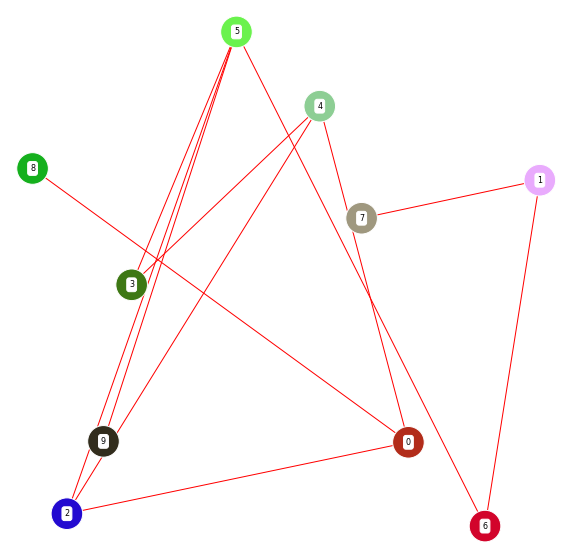

In [9]:
#Specifying different colors and locations

# How to specify new locations

variable_locations =np.array([[random.uniform(0, 1),
                           random.uniform(0, 1),
                           random.uniform(0, 1)] for i in range(0,len(current_graph_example.nodes))])

celii_locations = dict([(n,vl) for n,vl in zip(current_graph_example.nodes,variable_locations)])

# How to specify new colors with dictionary
print("\n\n\n*************** DICTATING THE COLORS AND DICTIONARIES  *********************")

celii_colors= dict([(n,vl) for n,vl in zip(current_graph_example.nodes,variable_locations)])



return_value = graph_network_vp3(current_graph_example,plot_type="2D",
                                            layout="collapse_z",
                                           locations = celii_locations,
                                          colors="locations",
                                 colors_edge = "red"
                                 #default_color_edge="blue"
                                         #colors = celii_colors
                                            )


In [ ]:
print("\n\n\n*************** OVERLAYING MULTIPLE GRAPHS  *********************")
# Doing multiple graphs:
graphs_in_experiment = list(data_structure.keys())
graph_objects_list = [ data_structure[k]["example_graph"] for k in graphs_in_experiment[4:7]].copy()

return_value = graph_network_vp3(graph_objects_list,plot_type="2D",
                                layout="random",
                                colors=["blue","pink","purple"],
                                #colors_edge=["black","blue","black"]
                                )

In [ ]:
# Testing the directional in 3D:
#creates the new directional graph
# ------- MAKE THE FIRST GRAPH ------

graphs_in_experiment = list(data_structure.keys())
current_graph_example_1 = data_structure[graphs_in_experiment[2]]["example_graph"]
current_graph_example_2 = data_structure[graphs_in_experiment[4]]["example_graph"]


DG = nx.DiGraph()
DG.add_edges_from(list(current_graph_example.edges))
DG.add_nodes_from(list(current_graph_example.edges))
#missing_nodes = [k for k in current_graph_example.nodes if k not in DG.nodes]


#creates dictionary for node and edge colors
node_colors = dict([(k,np.random.uniform(0,1,(3,))) for k in DG.nodes])

edge_colors =  np.ones((len(DG.edges),3))
edge_colors[:4] = np.array([0,1,0])
edge_colors[4:7] = np.array([1,0,0])
edge_colors[7:] = np.array([0,0,1])

edge_colors_dict = dict([(k,edge_colors[i]) for i,k in enumerate(DG.edges)])

# ------- MAKE THE SECOND GRAPH ------

DG_2 = nx.DiGraph()
DG_2.add_edges_from(list(current_graph_example_2.edges))
DG_2.add_nodes_from(list(current_graph_example_2.edges))


#creates dictionary for node and edge colors
node_colors_2 = dict([(k,np.random.uniform(0,1,(3,))) for k in DG_2.nodes])

edge_colors_2 =  np.ones((len(DG_2.edges),3))
edge_colors_2[:4] = np.array([0,1,0])
edge_colors_2[4:7] = np.array([1,0,0])
edge_colors_2[7:] = np.array([0,0,1])

edge_colors_dict_2 = dict([(k,edge_colors_2[i]) for i,k in enumerate(DG_2.edges)])


graph_network_vp3([DG,DG_2],plot_type="3D",layout="random",locations=None,
                 #colors=[node_colors,node_colors_2],
                  colors=["blue","red"],
                 default_color="blue",
                  #colors_edge = [edge_colors_dict,edge_colors_dict_2],
                  colors_edge = ["brown","black"],
                  default_color_edge = "green",
                 plot_title="Example on Digraph",
                 return_fig = False)

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import random
from grave import plot_network, style_merger



def degree_colorer(node_attributes):
    deg = node_attributes['degree']
    shape = 'o' #random.choice(['s', 'o', '^', 'v', '8'])
    return {'color': 'b', 'size': 20*deg, 'shape': shape}

def font_styler(attributes):
    return {'font_size': 8,
            'font_weight': .5,
            'font_color': 'k'}

def tiny_font_styler(attributes):
    return {'font_size': 4,
            'font_weight': .5,
            'font_color': 'r'}

def pathological_edge_style(edge_attrs):
    return {'color': random.choice(['r', (0, 1, 0, .5), 'xkcd:ocean'])}


network = nx.grid_2d_graph(4, 6)

nx.set_node_attributes(network, dict(network.degree()), 'degree')

fig, ax = plt.subplots()
plot_network(network, ax=ax, layout=lambda G: {node: node for node in G},
             node_style=degree_colorer,
             edge_style=pathological_edge_style,
             node_label_style=font_styler,
             edge_label_style=tiny_font_styler)

plt.show()